In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
personal_df = pd.read_csv("personal_details.csv")
loan_df = pd.read_csv("loan_details.csv")
employment_df = pd.read_csv("employment_details.csv")

In [3]:
# Merge the DataFrames using the 'Id' column as the key
banking_df = pd.merge(personal_df, loan_df, on='Id')
banking_df = pd.merge(banking_df, employment_df, on='Id')

In [4]:
banking_df

,Id,Gender,Marital Status,Family members,Status of education,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History,Property_Area,Loan_Status,Self_Employed,Income of applicant,Income of coapplicant
0,1,Male,Yes,2,Not Graduate,156.0,360.0,1.0,Rural,N,No,1166,1053
1,2,Male,Yes,0,Graduate,186.0,400.0,1.0,Rural,Y,No,4689,3261
2,3,Female,Yes,3+,Graduate,50.0,360.0,1.0,Urban,N,No,21730,0
3,4,Male,Yes,1,Not Graduate,95.0,360.0,1.0,Urban,Y,NaN,8333,0
4,5,Male,No,0,Not Graduate,90.0,180.0,1.0,Urban,N,No,2795,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47851,47852,Male,Yes,0,Graduate,171.0,360.0,1.0,Semiurban,Y,No,2073,4647
47852,47853,Male,Yes,3+,Not Graduate,30.0,360.0,1.0,Semiurban,Y,No,3026,0
47853,47854,Female,No,0,Graduate,132.0,360.0,1.0,Rural,Y,No,5875,0
47854,47855,Male,Yes,3+,Graduate,100.0,180.0,1.0,Urban,Y,No,2518,5000


In [5]:
#personal_df.head()
loan_df.head()
#employment_df.head()

,Id,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History,Property_Area,Loan_Status
0,31453,400.0,360.0,1.0,Semiurban,Y
1,21375,438.0,360.0,1.0,Semiurban,Y
2,27992,214.0,360.0,1.0,Urban,Y
3,3326,128.0,360.0,1.0,Urban,Y
4,22227,116.0,84.0,0.0,Urban,N


## Data Cleaning

In [6]:
# Rename the columns


banking_df.rename(columns={'LoanAmount applied for (in thoudands)': 'LoanAmount_in_Thousands'}, inplace=True)
banking_df.rename(columns={'Income of applicant': 'Applicant_Income'}, inplace=True)
banking_df.rename(columns={'Income of coapplicant': 'CoApplicant_Income'}, inplace=True)

banking_df.rename(columns={'Marital Status': 'Marital_Status'}, inplace=True)
banking_df.rename(columns={'Family members': 'Family_Members'}, inplace=True)
banking_df.rename(columns={'Status of education': 'Education'}, inplace=True)


In [7]:
banking_df.isnull().sum()

Id                            0
Gender                     1180
Marital_Status                0
Family_Members             1241
Education                     0
LoanAmount_in_Thousands    2196
Loan_Amount_Duration       1489
Credit_History             3447
Property_Area                 0
Loan_Status                   0
Self_Employed              2545
Applicant_Income              0
CoApplicant_Income            0
dtype: int64

In [8]:
banking_df.describe()

,Id,LoanAmount_in_Thousands,Loan_Amount_Duration,Credit_History,Applicant_Income,CoApplicant_Income
count,47856.000000,45660.000000,46367.000000,44409.000000,47856.000000,47856.000000
mean,23928.500000,135.906789,343.222658,0.829539,4854.436748,1664.988486
std,13814.981578,70.156703,61.561339,0.376041,3900.875350,1910.643113
min,1.000000,30.000000,84.000000,0.000000,1064.000000,0.000000
25%,11964.750000,100.000000,360.000000,1.000000,2666.000000,0.000000
50%,23928.500000,125.000000,360.000000,1.000000,3660.000000,1387.000000
75%,35892.250000,160.000000,360.000000,1.000000,5566.000000,2583.000000
max,47856.000000,481.000000,480.000000,1.000000,25515.000000,8610.000000


In [9]:
banking_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47856 entries, 0 to 47855
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       47856 non-null  int64  
 1   Gender                   46676 non-null  object 
 2   Marital_Status           47856 non-null  object 
 3   Family_Members           46615 non-null  object 
 4   Education                47856 non-null  object 
 5   LoanAmount_in_Thousands  45660 non-null  float64
 6   Loan_Amount_Duration     46367 non-null  float64
 7   Credit_History           44409 non-null  float64
 8   Property_Area            47856 non-null  object 
 9   Loan_Status              47856 non-null  object 
 10  Self_Employed            45311 non-null  object 
 11  Applicant_Income         47856 non-null  int64  
 12  CoApplicant_Income       47856 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.1+ MB


In [10]:
# Remove duplicate rows , if any, in the DataFrame
banking_df = banking_df.drop_duplicates()

In [11]:

# Handle missing values in the 'Gender' column by filling with the mode (most common category)
banking_df['Gender'].fillna(banking_df['Gender'].mode()[0], inplace=True)

# Handle missing values in the 'Family members' column by filling with a default value
banking_df['Family_Members'].fillna(0, inplace=True)


In [12]:
# Handling Missing Values in "LoanAmount_in_Thousands" with Mean :

# Calculate the mean of the existing values in the column
loan_amount_mean = banking_df['LoanAmount_in_Thousands'].mean()

# Fill missing values with the calculated mean
banking_df['LoanAmount_in_Thousands'].fillna(loan_amount_mean, inplace=True)

In [13]:
# Handling Missing Values in "Loan_Amount_Duration" with Median:

# Calculate the median of the existing values in the column
loan_duration_median = banking_df['Loan_Amount_Duration'].median()

# Fill missing values with the calculated median
banking_df['Loan_Amount_Duration'].fillna(loan_duration_median, inplace=True)

In [14]:
# Handle missing values in the 'Self_Employed' column by filling with the mode (most common category)
banking_df['Self_Employed'].fillna(banking_df['Self_Employed'].mode()[0], inplace=True)

In [15]:
# Impute null values in the 'Credit_History' column with 0 (no credit history)
banking_df['Credit_History'].fillna(0, inplace=True)

In [16]:
# Convert 'Loan_Amount_Duration' and 'Credit_History' columns to integers
banking_df['Loan_Amount_Duration'] = banking_df['Loan_Amount_Duration'].astype(int)
banking_df['Credit_History'] = banking_df['Credit_History'].astype(int)


In [17]:
# Detecting Outliers

banking_df['Loan_Amount_Duration'].describe()
#banking_df['LoanAmount_in_Thousands'].describe()

#banking_df['Applicant_Income'].describe()
#banking_df['CoApplicant_Income'].describe()



count    47856.000000
mean       343.744672
std         60.666013
min         84.000000
25%        360.000000
50%        360.000000
75%        360.000000
max        480.000000
Name: Loan_Amount_Duration, dtype: float64

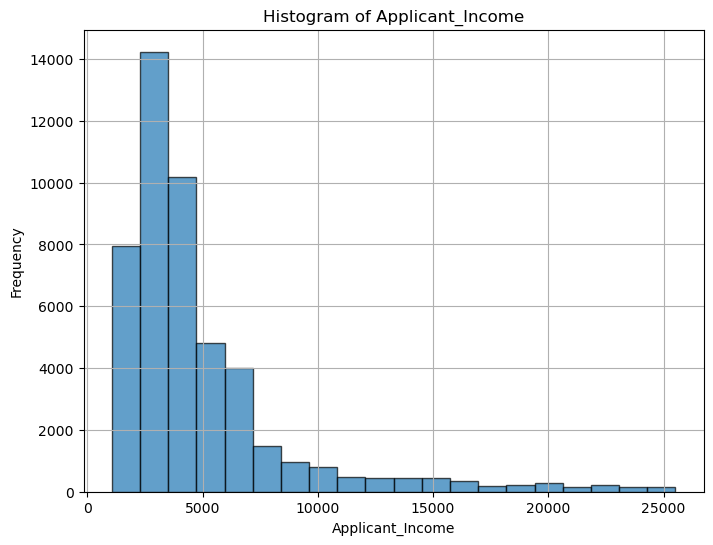

In [18]:
# Create a histogram for Applicant_Income
plt.figure(figsize=(8, 6))
plt.hist(banking_df['Applicant_Income'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Applicant_Income')
plt.ylabel('Frequency')
plt.title('Histogram of Applicant_Income')
plt.grid(True)
plt.show()

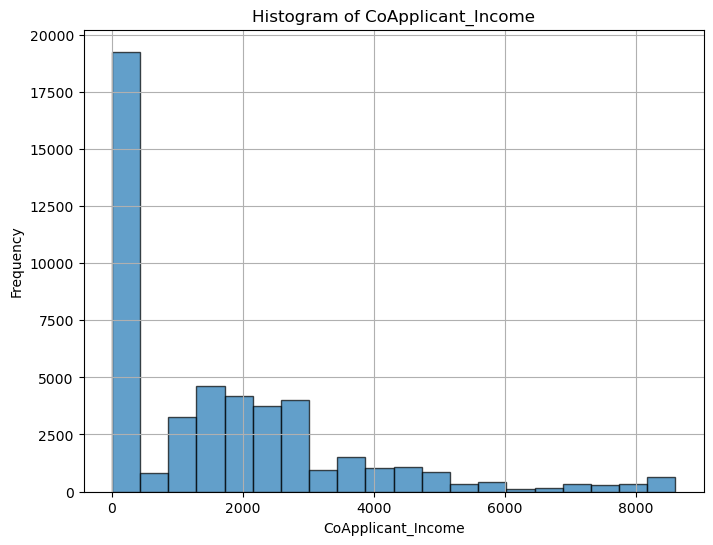

In [19]:
# Create a histogram for CoApplicant_Income
plt.figure(figsize=(8, 6))
plt.hist(banking_df['CoApplicant_Income'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('CoApplicant_Income')
plt.ylabel('Frequency')
plt.title('Histogram of CoApplicant_Income')
plt.grid(True)

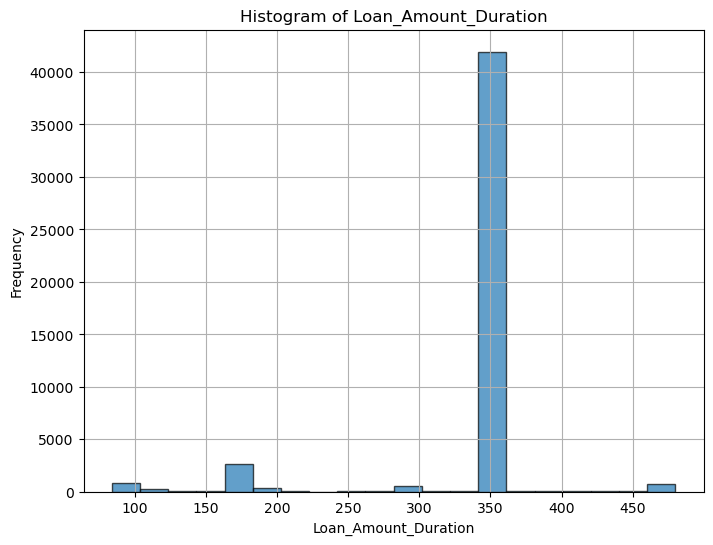

In [20]:
# Create a histogram for Loan_Amount_Duration
plt.figure(figsize=(8, 6))
plt.hist(banking_df['Loan_Amount_Duration'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Loan_Amount_Duration')
plt.ylabel('Frequency') 
plt.title('Histogram of Loan_Amount_Duration')
plt.grid(True)
plt.show()


In [21]:
# Filter the DataFrame to remove outliers

#Since 90% of the duration amount is 360 , we can take only those values

banking_df = banking_df[banking_df['Loan_Amount_Duration'] == 360]

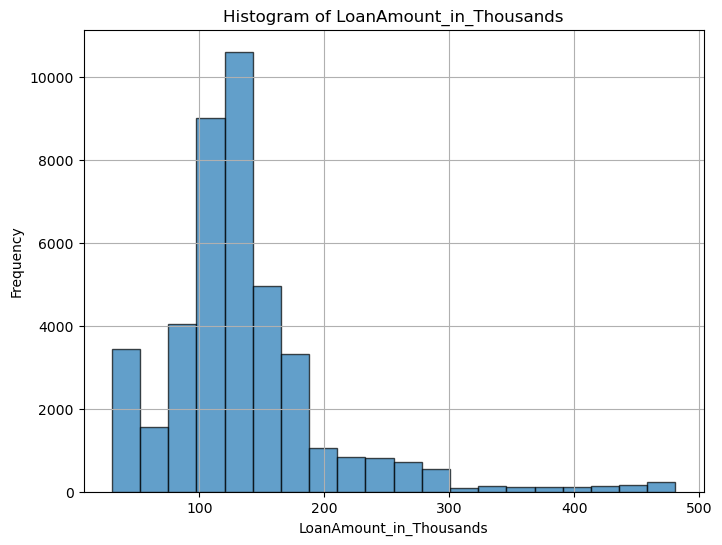

In [22]:
# Create a histogram for Loan_Amount_Duration
plt.figure(figsize=(8, 6))
plt.hist(banking_df['LoanAmount_in_Thousands'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('LoanAmount_in_Thousands')
plt.ylabel('Frequency')
plt.title('Histogram of LoanAmount_in_Thousands')
plt.grid(True)
plt.show()

Given that there are very minimal values beyond 300 in the "LoanAmount_in_Thousands" column, and considering that these values can be outliers, we can keep them unless they are definitively data errors

Since a banking company requires details of as many customers as they can we need not delete the outliers in most of the columns i.e in LoanAmount_in_Thousands , Applicant_Income etc.



In the analysis part I feel that these outliers will be important and will play a key part . So let us continue with this cleaning and do the eda.

## EDA

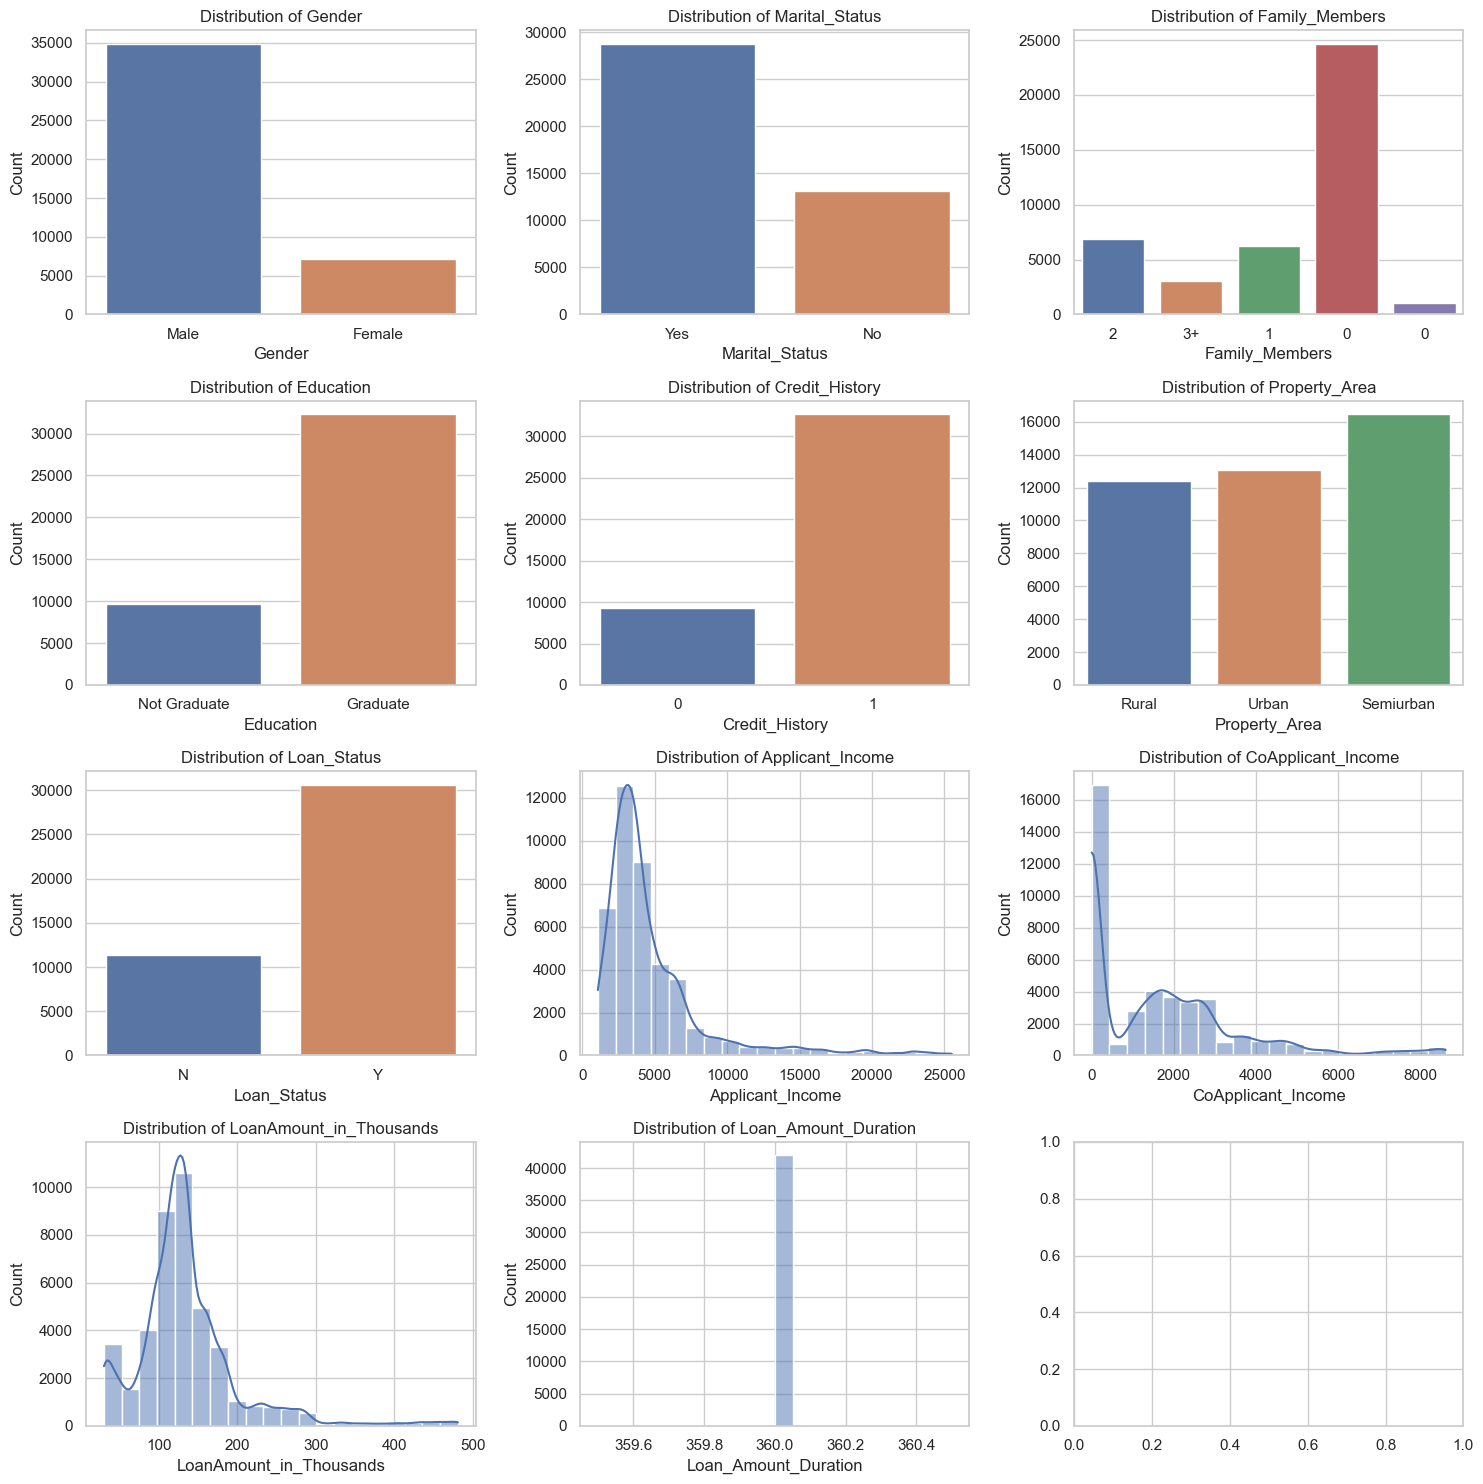

In [23]:

# Set the style for plots (optional)
sns.set(style="whitegrid")

# Create subplots for visualization
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Categorical attributes
categorical_attributes = ["Gender", "Marital_Status", "Family_Members", "Education", "Credit_History", "Property_Area", "Loan_Status"]

for i, attr in enumerate(categorical_attributes):
    ax = axes[i // 3, i % 3]
    sns.countplot(data=banking_df, x=attr, ax=ax)
    ax.set_title(f"Distribution of {attr}")
    ax.set_xlabel(attr)
    ax.set_ylabel("Count")

# Numerical attributes
numerical_attributes = ["Applicant_Income", "CoApplicant_Income", "LoanAmount_in_Thousands", "Loan_Amount_Duration"]

for i, attr in enumerate(numerical_attributes):
    ax = axes[(i + len(categorical_attributes)) // 3, (i + len(categorical_attributes)) % 3]
    sns.histplot(data=banking_df, x=attr, ax=ax, bins=20, kde=True)
    ax.set_title(f"Distribution of {attr}")
    ax.set_xlabel(attr)
    ax.set_ylabel("Count")

# Show the plots
plt.tight_layout()
plt.show()

#This code will create a 4x3 grid of subplots, where each subplot represents the distribution of a specific attribute. It uses count plots for categorical attributes and histograms for numerical attributes. You can customize the visualizations further based on your preferences and analysis goals.







### Explore Loan Approval Rates by Categorical Attributes:

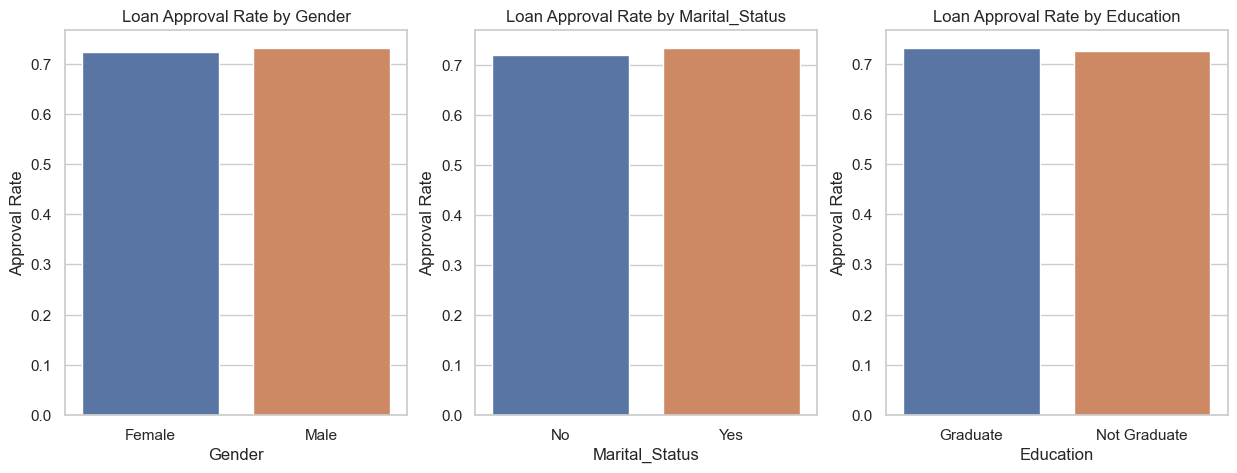

In [24]:

# Define a mapping for loan status ('N' -> 0, 'Y' -> 1)
loan_status_mapping = {'N': 0, 'Y': 1}

# Convert 'Loan_Status' to numeric using the mapping
banking_df['Loan_Status'] = banking_df['Loan_Status'].map(loan_status_mapping)

# Group by categorical attributes and calculate approval rates
categorical_attributes = ["Gender", "Marital_Status", "Education"]
approval_rates = {}
for attr in categorical_attributes:
    approval_rates[attr] = banking_df.groupby(attr)["Loan_Status"].mean()

# Create bar plots to visualize approval rates
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_attributes), figsize=(15, 5))
for i, attr in enumerate(categorical_attributes):
    sns.barplot(x=approval_rates[attr].index, y=approval_rates[attr].values, ax=axes[i])
    axes[i].set_title(f"Loan Approval Rate by {attr}")
    axes[i].set_xlabel(attr)
    axes[i].set_ylabel("Approval Rate")
plt.show()


### Explore Loan Approval by Multiple Categories:

Analyze loan approval rates across combinations of multiple categorical attributes using pivot tables or heatmaps.
Look for patterns and trends in how combinations of attributes impact loan approval.

A heatmap is a valuable tool for visualizing complex relationships within your data. It allows you to identify trends and patterns easily and make data-driven decisions based on these insights.

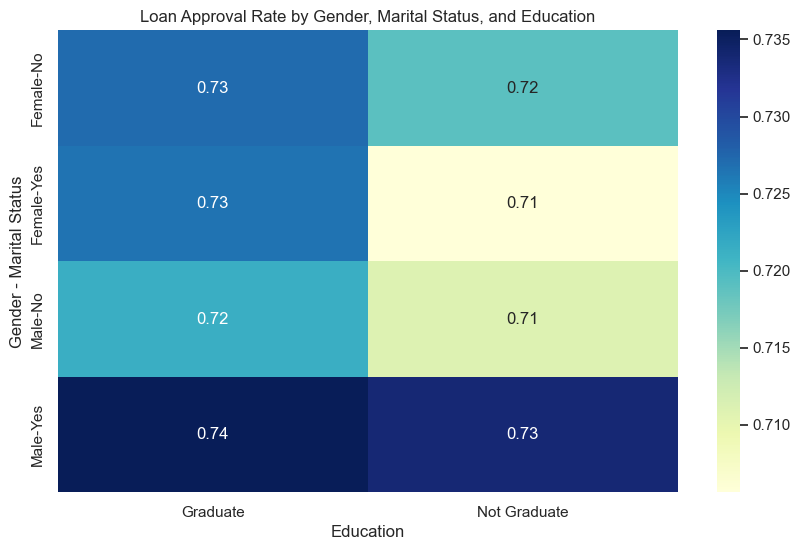

In [25]:
# Pivot table to explore approval rates by multiple categories
pivot_table = pd.pivot_table(banking_df, values="Loan_Status", index=["Gender", "Marital_Status"], columns="Education", aggfunc="mean")

# Create a heatmap to visualize approval rates by multiple categories
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Loan Approval Rate by Gender, Marital Status, and Education")
plt.xlabel("Education")
plt.ylabel("Gender - Marital Status")
plt.show()


We can see that almost all the values are close to 0.75 i.e the approval rate is close to 75%

Which is considered to be a mid to average acceptance rate and is considered good for the Bank

### Scatter plot to explore how "Applicant_Income" and "CoApplicant_Income" relate to each other and how they relate to the "LoanAmount_in_Thousands

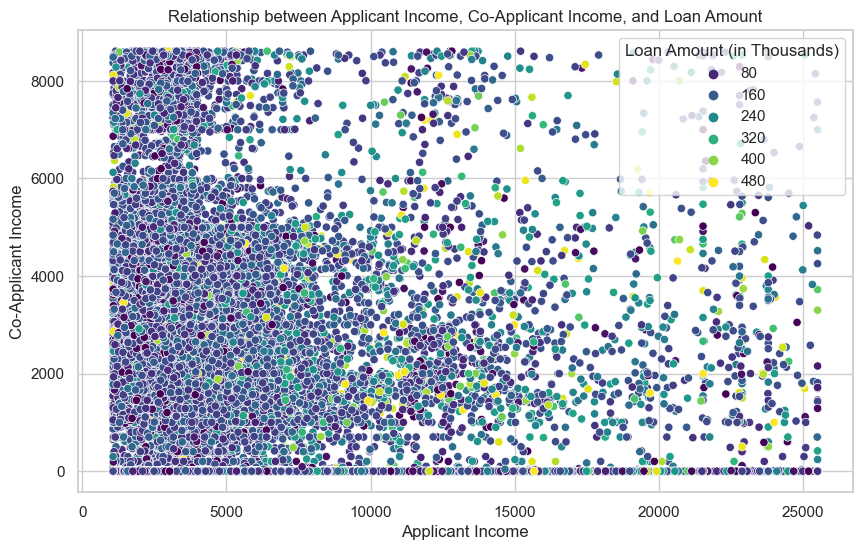

In [26]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=banking_df, x="Applicant_Income", y="CoApplicant_Income", hue="LoanAmount_in_Thousands", palette="viridis")
plt.title("Relationship between Applicant Income, Co-Applicant Income, and Loan Amount")
plt.xlabel("Applicant Income")
plt.ylabel("Co-Applicant Income")
plt.legend(title="Loan Amount (in Thousands)", title_fontsize="12")
plt.show()

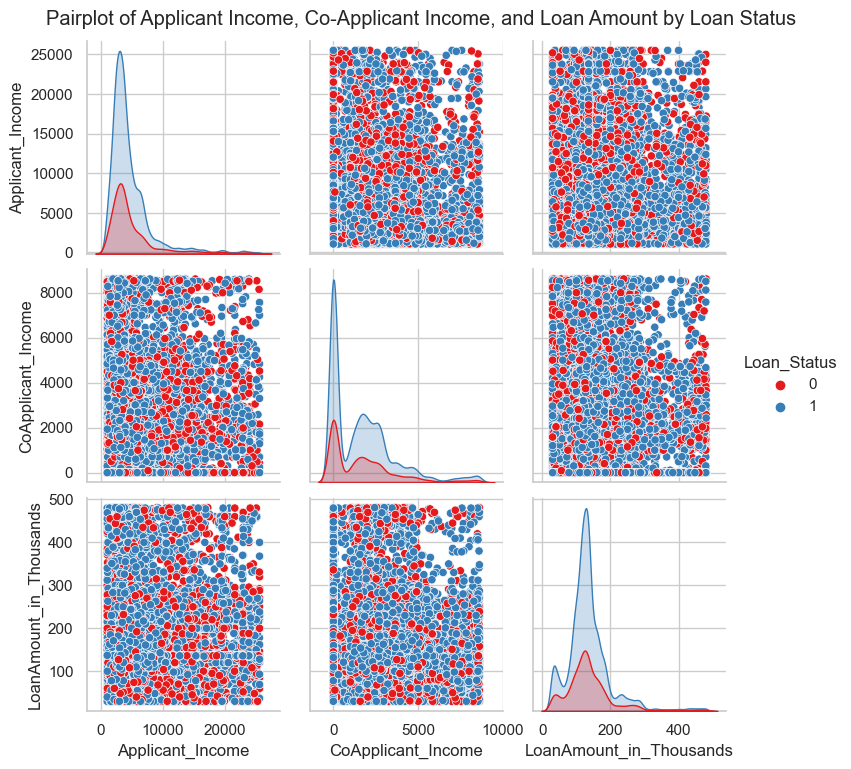

In [27]:
# Create a pairplot for selected variables
sns.pairplot(banking_df, vars=["Applicant_Income", "CoApplicant_Income", "LoanAmount_in_Thousands"], hue="Loan_Status", palette="Set1")
plt.suptitle("Pairplot of Applicant Income, Co-Applicant Income, and Loan Amount by Loan Status", y=1.02)
plt.show()

In this pairplot, "Applicant_Income," "CoApplicant_Income," and "LoanAmount_in_Thousands" are compared pairwise, and the hue (color) represents loan status ("Approved" or "Not Approved"). This can help you visualize how these variables are distributed in relation to loan approval.

Here in these pairplots represented above , we can see that people who have both the Loan Status Values are spread across the graph in an even way , and we can interpret that Applicant Income, Co-Applicant Income, and Loan Amount contains both loan status people spread across.

### Countplot to visualize the distribution of credit history among approved and rejected applications


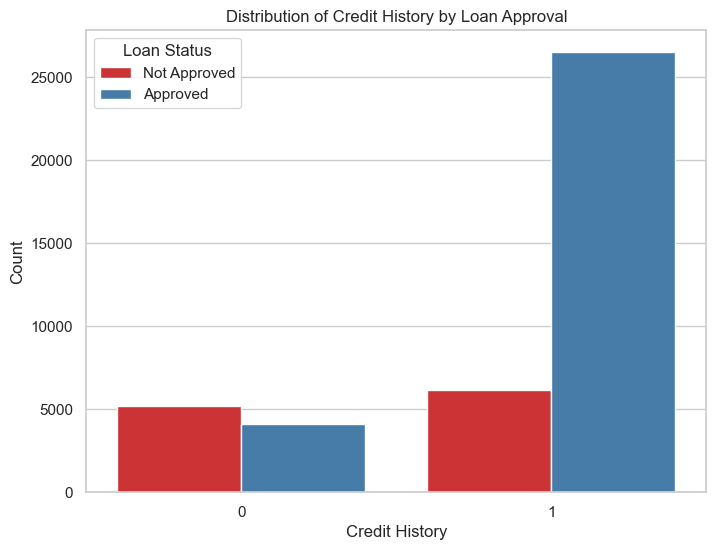

In [28]:
# Countplot to visualize the distribution of credit history among approved and rejected applications
plt.figure(figsize=(8, 6))
sns.countplot(data=banking_df, x="Credit_History", hue="Loan_Status", palette="Set1")
plt.title("Distribution of Credit History by Loan Approval")
plt.xlabel("Credit History")
plt.ylabel("Count")
plt.legend(title="Loan Status", labels=["Not Approved", "Approved"])
plt.show()


You can observe from the countplot whether there are loan durations that appear to have higher approval rates (more "Approved" bars) compared to others.

The approval rates provide a numerical representation of this observation, showing the proportion of approvals for each loan duration category.

Here you can clearly see that Loan is being approved to majority of the People who only have a Credit History previously

This means that we can get focus on customers with a Credit History 

In [29]:
# Quantify the impact of credit history on loan approval, you can calc the approval rates for diff credit history categories:

# Calculate approval rates by credit history
approval_rates = banking_df.groupby("Credit_History")["Loan_Status"].mean()

print("Approval Rates by Credit History:")
print(approval_rates)

Approval Rates by Credit History:
Credit_History
0    0.440993
1    0.811303
Name: Loan_Status, dtype: float64


### Countplot to visualize the distribution of property areas among approved and rejected applications

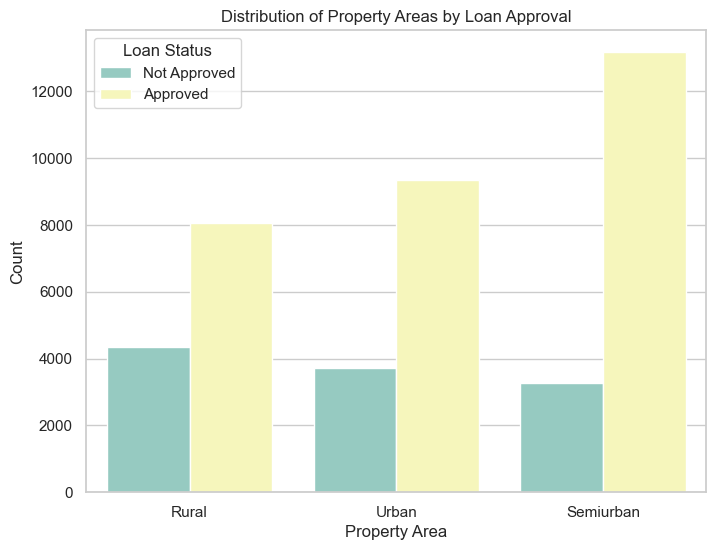

In [30]:
# Countplot to visualize the distribution of property areas among approved and rejected applications
plt.figure(figsize=(8, 6))
sns.countplot(data=banking_df, x="Property_Area", hue="Loan_Status", palette="Set3")
plt.title("Distribution of Property Areas by Loan Approval")
plt.xlabel("Property Area")
plt.ylabel("Count")
plt.legend(title="Loan Status", labels=["Not Approved", "Approved"])
plt.show()

In [31]:
# Calculate approval rates by property area
approval_rates = banking_df.groupby("Property_Area")["Loan_Status"].mean()

print("Approval Rates by Property Area:")
print(approval_rates)


Approval Rates by Property Area:
Property_Area
Rural        0.649284
Semiurban    0.800961
Urban        0.714810
Name: Loan_Status, dtype: float64


**Explanation :**

You can observe from the countplot whether there are differences in the distribution of property areas among approved and rejected applications.

The approval rates provide a numerical representation of this observation, showing the proportion of approvals for rural and urban property areas.

You can see that the Semi-Urban area people are more and the loan approval Percentage is also higher  0.800961 , when compared to Rural 0.649284 and Urban 0.714810 

But ananomously we can see that the approval rate is higher in all the Areas than the Rejection , so we can check whats the reason for the rejection and try to convert them and make them into Approval

### Comparing Loan Approval Rates by Gender

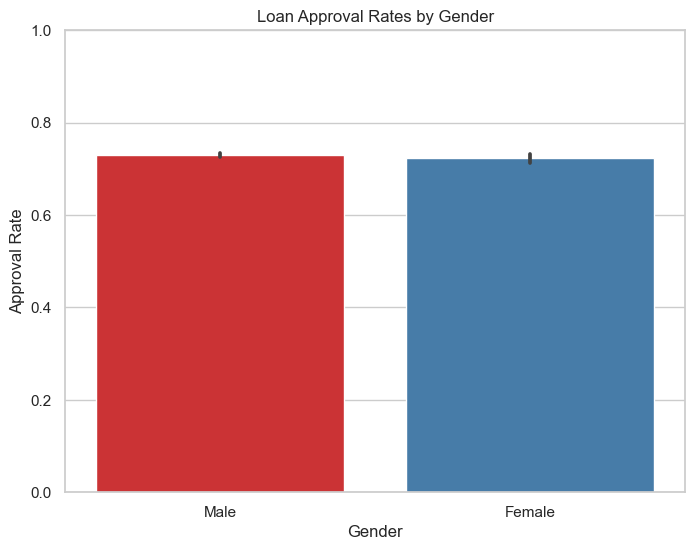

In [32]:
# Bar chart to compare loan approval rates by gender
plt.figure(figsize=(8, 6))
sns.barplot(data=banking_df, x="Gender", y="Loan_Status", palette="Set1")
plt.title("Loan Approval Rates by Gender")
plt.xlabel("Gender")
plt.ylabel("Approval Rate")
plt.ylim(0, 1)  # Set the y-axis limit to represent approval rate (0 to 1)
plt.show()


###  Visualizing Applicant Income Distribution

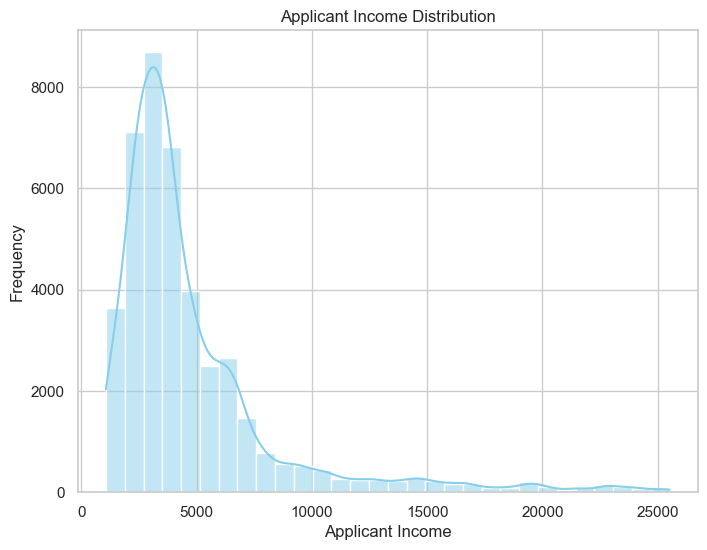

In [33]:
# Create a histogram to visualize the distribution of applicant income
plt.figure(figsize=(8, 6))
sns.histplot(data=banking_df, x="Applicant_Income", bins=30, kde=True, color="skyblue")
plt.title("Applicant Income Distribution")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()


Though the Applicant Income is right - skewed enormously , with respect to the scenario where we are analyzing,
I feel that the Income Range of all the applicants is very important to understand and hence not eliminate them.

### Analyzing the Relationship Between Loan Amount and Loan Duration

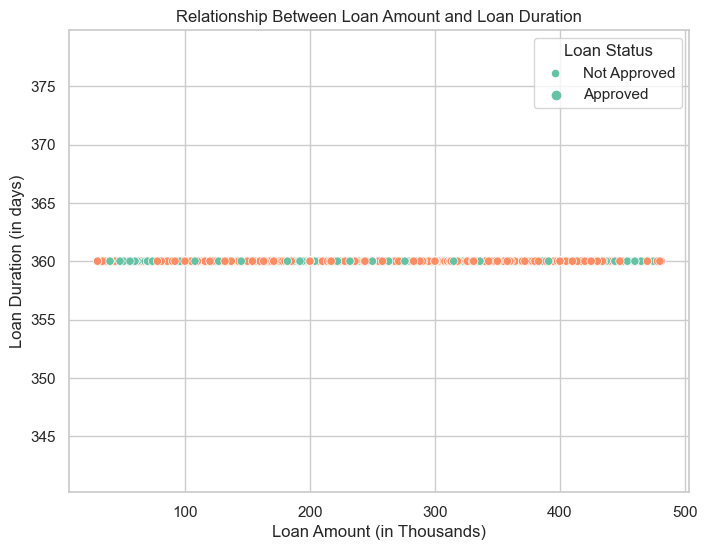

In [34]:
# Scatter plot to analyze the relationship between loan amount and loan duration
plt.figure(figsize=(8, 6))
sns.scatterplot(data=banking_df, x="LoanAmount_in_Thousands", y="Loan_Amount_Duration", hue="Loan_Status", palette="Set2")
plt.title("Relationship Between Loan Amount and Loan Duration")
plt.xlabel("Loan Amount (in Thousands)")
plt.ylabel("Loan Duration (in days)")
plt.legend(title="Loan Status", labels=["Not Approved", "Approved"])
plt.show()

### Loan Approval Rates by Education Level

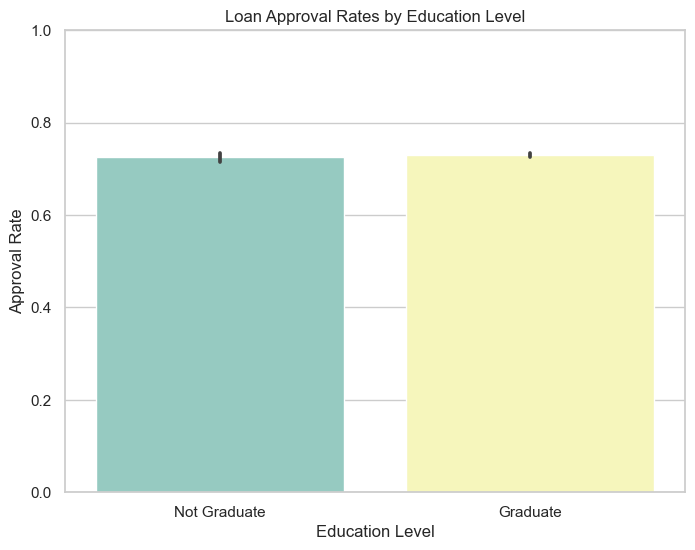

In [35]:
# Create a bar chart to compare loan approval rates by education
plt.figure(figsize=(8, 6))
sns.barplot(data=banking_df, x="Education", y="Loan_Status", palette="Set3")
plt.title("Loan Approval Rates by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Approval Rate")
plt.ylim(0, 1)
plt.show()

###  Distribution of Family Members

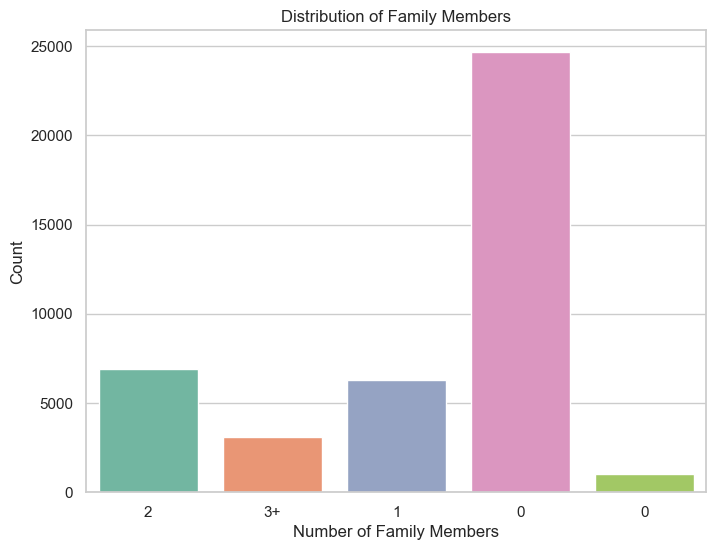

In [36]:
# Creating a countplot to visualize the distribution of family members
plt.figure(figsize=(8, 6))
sns.countplot(data=banking_df, x="Family_Members", palette="Set2")
plt.title("Distribution of Family Members")
plt.xlabel("Number of Family Members")
plt.ylabel("Count")
plt.show()


### Loan Amount by Property Area

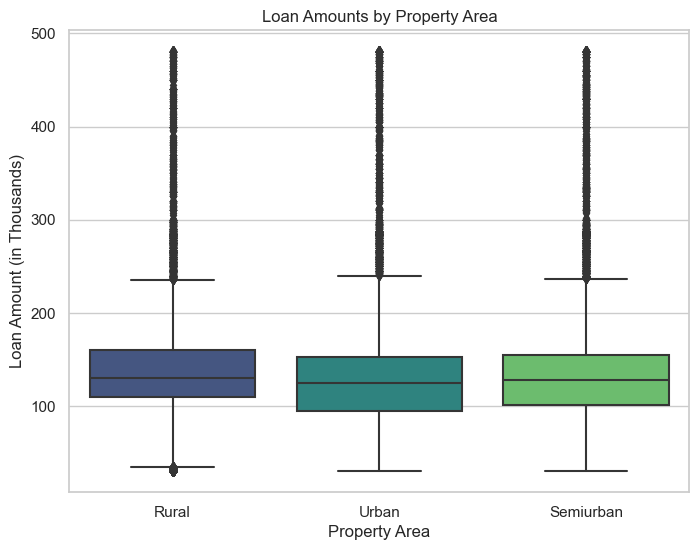

In [37]:
# Boxplot to compare loan amounts by property area
plt.figure(figsize=(8, 6))
sns.boxplot(data=banking_df, x="Property_Area", y="LoanAmount_in_Thousands", palette="viridis")
plt.title("Loan Amounts by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Loan Amount (in Thousands)")
plt.show()

### Loan Approval Rates by Marital Status

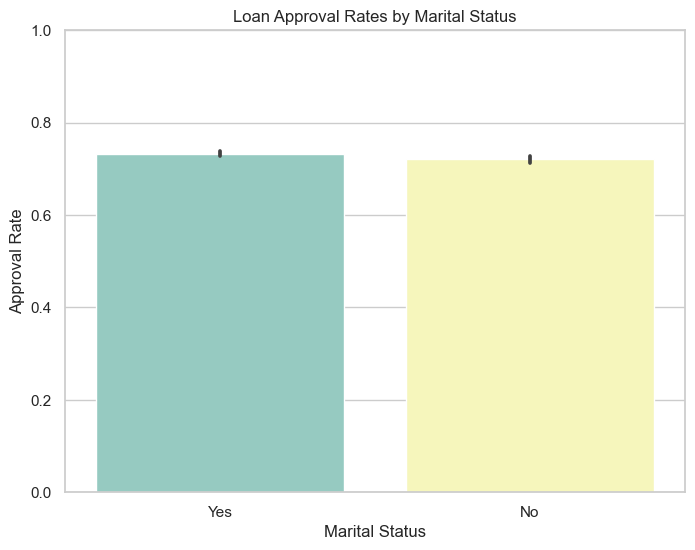

In [38]:
# Bar chart to compare loan approval rates by marital status
plt.figure(figsize=(8, 6))
sns.barplot(data=banking_df, x="Marital_Status", y="Loan_Status", palette="Set3")
plt.title("Loan Approval Rates by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Approval Rate")
plt.ylim(0, 1)
plt.show()

###  Loan Amount Distribution by Credit History

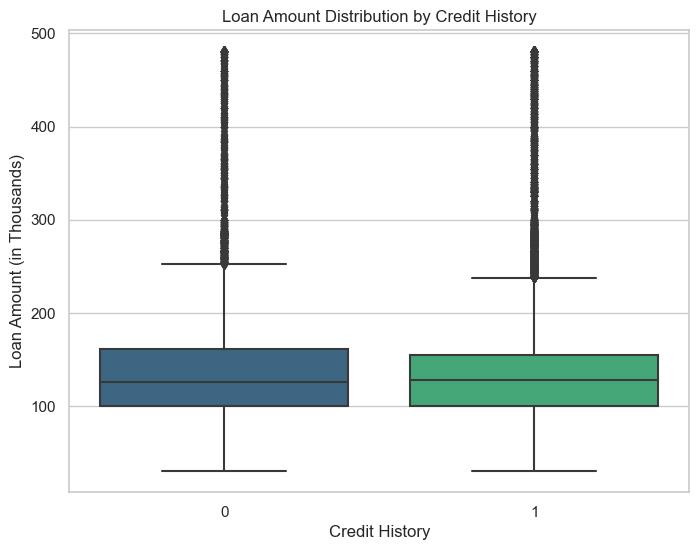

In [39]:
# Creating a boxplot to compare loan amounts by credit history
plt.figure(figsize=(8, 6))
sns.boxplot(data=banking_df, x="Credit_History", y="LoanAmount_in_Thousands", palette="viridis")
plt.title("Loan Amount Distribution by Credit History")
plt.xlabel("Credit History")
plt.ylabel("Loan Amount (in Thousands)")
plt.show()

### Recommendations

1. Target Specific Demographics:

Based on your data analysis, identify specific demographics that are more likely to be approved for loans. This could include factors such as gender, education level, marital status, family size, and income. Here's how to provide recommendations:

If certain demographic groups have a significantly higher loan approval rate, recommend targeting marketing efforts toward those groups.

Create customized marketing campaigns and loan products tailored to the needs and preferences of these demographics.
Use customer segmentation to classify applicants into different groups and personalize interactions and offers based on their characteristics.


2. Adjust Loan Criteria:

Examine the data to understand which loan criteria strongly affect approval rates. Consider making adjustments to these criteria to improve loan approval rates:

If credit history is a significant factor, consider implementing credit-building programs to help applicants improve their creditworthiness before applying for loans.

If income levels impact loan approval, adjust the income criteria for specific loan products to accommodate a broader range of applicants.

If loan duration affects approval rates, offer a variety of loan duration options to cater to different customer needs.

3. Improve Customer Satisfaction:

Enhancing the customer experience can lead to higher loan approval rates and improved customer retention. Recommendations include:

Streamline the loan application process to make it more user-friendly and efficient.

Provide clear communication about loan application status and requirements. 

Offer online or mobile services for convenient application and tracking. 
Establish a responsive customer support system to address applicant inquiries and concerns. 

4. Monitor and Refine:

Recommend ongoing monitoring and refinement of strategies based on data analysis. Continuously track the impact of recommendations and make adjustments as needed:

Regularly review loan approval rates and default rates to ensure that strategies are effective.
Collect customer feedback to understand their experiences and use it to make improvements.
Adapt to changing market conditions and regulations.

In [40]:
# Perform sentiment analysis based on credit history
positive_reasons = banking_df[banking_df["Credit_History"] == 1]["Loan_Status"]
negative_reasons = banking_df[banking_df["Credit_History"] == 0]["Loan_Status"]

# Analyze the sentiment
positive_sentiment = "Positive" if "Rejected" not in positive_reasons.to_list() else "Negative"
negative_sentiment = "Positive" if "Approved" not in negative_reasons.to_list() else "Negative"

# Results
print("Sentiment Analysis Results:")
print(f"Positive Credit History Sentiment: {positive_sentiment}")
print(f"Negative Credit History Sentiment: {negative_sentiment}")


Sentiment Analysis Results:
Positive Credit History Sentiment: Positive
Negative Credit History Sentiment: Positive


We perform a simple sentiment analysis based on the presence of "Approved" or "Rejected" in the loan status for different credit history categories.

If all loan applications with a credit history of 1 were approved, we label it as "Positive." If any of them were rejected, we label it as "Negative."

Similarly, if all loan applications with a credit history of 0 were rejected, we label it as "Positive." If any of them were approved, we label it as "Negative."

We can also do :

**Time Analysis:**

For eg. analyze the time it takes to process loan applications and reach a decision.

Examine whether a longer turnaround time is associated with lower approval rate.

Consider whether customers express dissatisfaction with lengthy processing times.

**Approval/Rejection Rate by any Application Method:**

Compare approval and rejection rates for applications submitted through different methods (e.g., in-person, online, mobile app).

Analyze if there is a significant difference in approval rates based on the application method.

If a particular method has lower approval rates, investigate whether this is affecting customer satisfaction.

### Actionable Insights and Recommendations for the Bank

1.

Insight: Lengthy or complex application processes may deter potential applicants.

  Recommendation: Simplify and streamline the application process to make it more user-friendly. Minimize unnecessary paperwork   and steps to reduce applicant frustration and drop-off rates.

2.

Insight: Lack of clear and timely communication can lead to customer dissatisfaction.

  Recommendation: Implement a robust communication system to keep applicants informed about their application status,             requirements, and progress. Provide transparency throughout the process.
  
3.

Insight: Since Credit history plays a significant role in loan approvals.

  Recommendation: Offer credit-building programs or resources to help applicants improve their creditworthiness. This can expand   the pool of eligible applicants and boost loan approvals.
  
4.

Insight: Loan durations and amounts have an impact on approval rates.

  Recommendation: Offer a variety of loan products with different durations and amounts to cater to a wide range of customer       needs. This allows applicants to choose products that align with their financial situations.
  
5.

Insight: Continuous assessment is necessary for ongoing improvement.

  Recommendation: Regularly monitor and report on key performance indicators, approval rates, default rates, and customer         satisfaction. Use this data to make data-driven decisions and continuously refine strategies.